In [3]:
import os
import pickle as pkl
import pandas as pd
import numpy as np

import pydeseq2
from pydeseq2.dds import DeseqDataSet
from pydeseq2.default_inference import DefaultInference
from pydeseq2.ds import DeseqStats

In [103]:
# Loading the data from package
#DATA_PATH = "/Users/katsiarynadavydzenka/Documents/PhD_AI/CN-aware-DGE/Python/datasets/"
#counts_df = pd.read_csv(os.path.join(DATA_PATH, "rna_counts_cnv_v2.csv"), index_col=0)
#counts_df = counts_df.T
#metadata = pd.read_csv(os.path.join(DATA_PATH, "metadata_v2.csv"), index_col=0)

In [51]:
# Test real data
DATA_PATH = "/Users/katsiarynadavydzenka/Documents/PhD_AI/TCGA/STAD/test"
counts_df = pd.read_csv(os.path.join(DATA_PATH, "rna.csv"), index_col=0)
counts_df = counts_df.T
metadata = pd.read_csv(os.path.join(DATA_PATH, "metadata.csv"), index_col=0)

In [53]:
#Data filtering
#genes_to_keep = counts_df.columns[counts_df.sum(axis=0) >= 10]
#counts_df = counts_df[genes_to_keep]
counts_df.shape

(64, 16467)

In [55]:
inference = DefaultInference(n_cpus=8)

dds = DeseqDataSet(
    counts=counts_df,
    metadata=metadata,
    design_factors="condition",
    refit_cooks=True,
    inference=inference,
)

dds.fit_size_factors()
dds.fit_genewise_dispersions()
dds.fit_dispersion_trend()
dds.fit_dispersion_prior()
dds.fit_MAP_dispersions()
dds.fit_LFC()

dds.calculate_cooks()
if dds.refit_cooks:
    # Replace outlier counts
    dds.refit()

# Statistical analysis
stat_res = DeseqStats(dds, 
                      alpha=0.05, 
                      cooks_filter=True, 
                      independent_filter=True)

stat_res.run_wald_test()

if stat_res.cooks_filter:
    stat_res._cooks_filtering()
stat_res.p_values

# p-value adjustment

if stat_res.independent_filter:
    stat_res._independent_filtering()
else:
    stat_res._p_value_adjustment()

stat_res.padj

stat_res.summary()

stat_res.lfc_shrink(coeff="condition_B_vs_A")

#Save results
OUTPUT_PATH = "/Users/katsiarynadavydzenka/Documents/PhD_AI/CN-aware-DGE/results/STAD/"
os.makedirs(OUTPUT_PATH, exist_ok=True)  # Create path if it doesn't exist
stat_res.results_df.to_csv(os.path.join(OUTPUT_PATH, "res_CNnaive.csv"))

Fitting size factors...
... done in 0.04 seconds.

Fitting dispersions...
... done in 1.75 seconds.

Fitting dispersion trend curve...
... done in 0.26 seconds.

Fitting MAP dispersions...
... done in 2.24 seconds.

Fitting LFCs...
... done in 1.01 seconds.

Calculating cook's distance...
... done in 0.07 seconds.

Replacing 556 outlier genes.

Fitting dispersions...
... done in 0.08 seconds.

Fitting MAP dispersions...
... done in 0.08 seconds.

Fitting LFCs...
... done in 0.07 seconds.

Running Wald tests...
... done in 0.56 seconds.

Fitting MAP LFCs...


Log2 fold change & Wald test p-value: condition B vs A
              baseMean  log2FoldChange     lfcSE      stat    pvalue      padj
A1BG-AS1     29.745399       -0.067171  0.239357 -0.280632  0.778993  0.842817
A2ML1     29319.797526       -3.102460  1.044208 -2.971114  0.002967  0.008881
A4GALT     1271.315666       -0.288784  0.193348 -1.493597  0.135281  0.215238
A4GNT       455.611732       -2.230452  0.631452 -3.532261  0.000412  0.001633
AAAS       2091.957826        0.246399  0.104723  2.352868  0.018629  0.041883
...                ...             ...       ...       ...       ...       ...
ZXDC       1591.210284        0.183447  0.116251  1.578019  0.114561  0.187951
ZYG11A       42.787794       -0.115264  0.445557 -0.258696  0.795870  0.855010
ZYG11B     2510.156872       -0.697143  0.162880 -4.280097  0.000019  0.000113
ZYX       15186.039450       -0.111036  0.189049 -0.587343  0.556974  0.659596
ZZEF1      5943.322785       -0.552503  0.169938 -3.251203  0.001149  0.0039

... done in 2.03 seconds.



In [57]:
#dds.obsm["size_factors"]
#dds.varm["genewise_dispersions"]
#dds.varm["fitted_dispersions"]
#print(
    #f"logres_prior={dds.uns['_squared_logres']}, sigma_prior={dds.uns['prior_disp_var']}"
#)
#dds.varm["MAP_dispersions"]
#dds.varm["dispersions"]
#dds.varm["LFC"]

In [59]:
#stat_res.plot_MA(s=10)

Volcano plot

In [61]:
from bioinfokit import analys, visuz

In [63]:
stat_res.results_df

,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj
A1BG-AS1,29.745399,-0.056891,0.230193,-0.280632,0.778993,0.842817
A2ML1,29319.797526,-0.435021,0.772831,-2.971114,0.002967,0.008881
A4GALT,1271.315666,-0.260028,0.189516,-1.493597,0.135281,0.215238
A4GNT,455.611732,-1.856749,0.661577,-3.532261,0.000412,0.001633
AAAS,2091.957826,0.232250,0.104167,2.352868,0.018629,0.041883
...,...,...,...,...,...,...
ZXDC,1591.210284,0.176666,0.115263,1.578019,0.114561,0.187951
ZYG11A,42.787794,-0.070358,0.390483,-0.258696,0.795870,0.855010
ZYG11B,2510.156872,-0.639373,0.162476,-4.280097,0.000019,0.000113
ZYX,15186.039450,-0.213494,0.182177,-0.587343,0.556974,0.659596


In [65]:
stat_res.results_df['padj'] = pd.to_numeric(stat_res.results_df['padj'], errors='coerce').fillna(1)

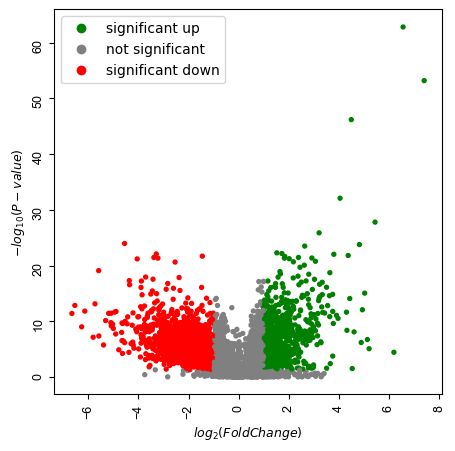

In [69]:
visuz.GeneExpression.volcano(df=stat_res.results_df, lfc='log2FoldChange', pv='padj', show=True, plotlegend=True)